In [11]:
import polars as pl
import plotnine as p9

In [3]:
files = ["search_query",
"page_visit",
 "add_to_cart",
 "remove_from_cart",
 "product_properties",
 "product_buy",
]

In [4]:
def list_int(df:pl.DataFrame,column:str):
    """ take string column of form "[ <int_1><spaces><int>...<int_16>]" and convert into list of int 16s."""
    df = (
        df.with_columns(
            pl.col(column).str.replace_all(" {2,}"," ")
            .str.strip_chars("[] ")
            .str.split(" ")
            .cast(pl.List(pl.Int16))
        )
    )
    return df

In [5]:
dfs = {f: pl.read_parquet(f"ubc_data/{f}.parquet") for f in files}

In [6]:
for file in files:
    if "timestamp" in dfs[file].columns:
        dfs[file] = dfs[file].with_columns(pl.col("timestamp").str.to_datetime(time_unit="ms"))
dfs["search_query"] = list_int(dfs["search_query"], "query")
dfs["product_properties"] = list_int(dfs["product_properties"], "name")

In [48]:
dfs["search_query"] = list_int(dfs["search_query"], "query")

In [7]:
dfs["search_query"].head()

client_id,timestamp,query
i64,datetime[ms],list[i16]
17649961,2022-08-05 08:59:55,"[21, 21, … 13]"
17649961,2022-08-05 09:00:59,"[21, 21, … 13]"
17649961,2022-08-05 09:00:59,"[21, 21, … 13]"
17649961,2022-08-05 09:30:20,"[21, 21, … 13]"
17649961,2022-08-05 09:30:20,"[21, 21, … 13]"


In [49]:
dfs["product_properties"] = list_int(dfs["product_properties"], "name")

In [50]:
!mkdir ubc_data_typed

In [8]:
for f in files:
    dfs[f].write_parquet(f"ubc_data_typed/{f}.parquet")

In [5]:
dfs["search_query"].head()

client_id,timestamp,query
i64,datetime[ms],str
17649961,2022-08-05 08:59:55,"""[ 21 21 13 168 158 204 145 2…"
17649961,2022-08-05 09:00:59,"""[ 21 21 13 168 158 204 145 2…"
17649961,2022-08-05 09:00:59,"""[ 21 21 13 168 158 204 145 2…"
17649961,2022-08-05 09:30:20,"""[ 21 21 13 168 158 204 145 2…"
17649961,2022-08-05 09:30:20,"""[ 21 21 13 168 158 204 145 2…"


In [6]:
dfs["page_visit"].head()

client_id,timestamp,url
i64,datetime[ms],i64
13906876,2022-07-13 10:37:45,12160626
13906876,2022-08-11 18:13:20,9464384
7825390,2022-05-26 10:28:05,3876331
13416433,2022-05-25 18:20:10,15017297
13416433,2022-06-03 20:03:20,13003066


In [20]:
dfs["product_buy"].head()

client_id,timestamp,sku
i64,datetime[ms],i64
17649961,2022-07-23 20:15:25,18485
16696114,2022-07-11 16:31:30,81192
10238779,2022-05-29 19:35:40,510014
10238779,2022-05-29 19:38:05,510014
10238779,2022-05-29 19:38:05,510014


In [75]:
dfs["product_buy"].dtypes

[Int64, Datetime(time_unit='ms', time_zone=None), Int64]

In [12]:
buy = dfs["product_buy"].with_columns(action=pl.lit("product_buy")).join(dfs["product_properties"], on="sku", how="left")
add_to_cart = dfs["add_to_cart"].with_columns(action=pl.lit("add_to_cart")).join(dfs["product_properties"], on="sku", how="left")

In [13]:
# Price Histogram

In [ ]:
# price relatively uniform

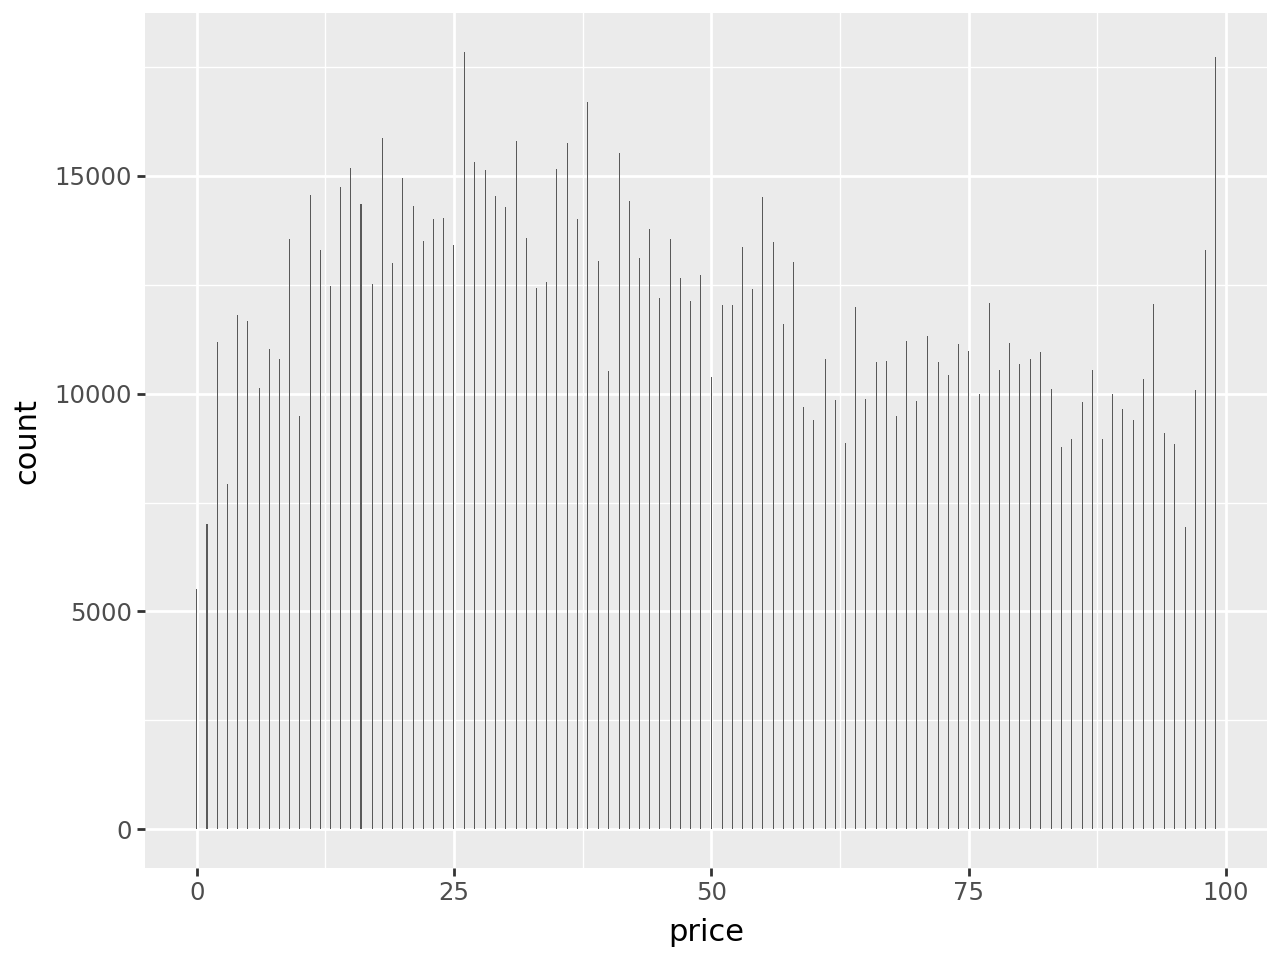

In [16]:
p9.ggplot(dfs["product_properties"],p9.aes(x="price")) + p9.geom_histogram(bins=1000)

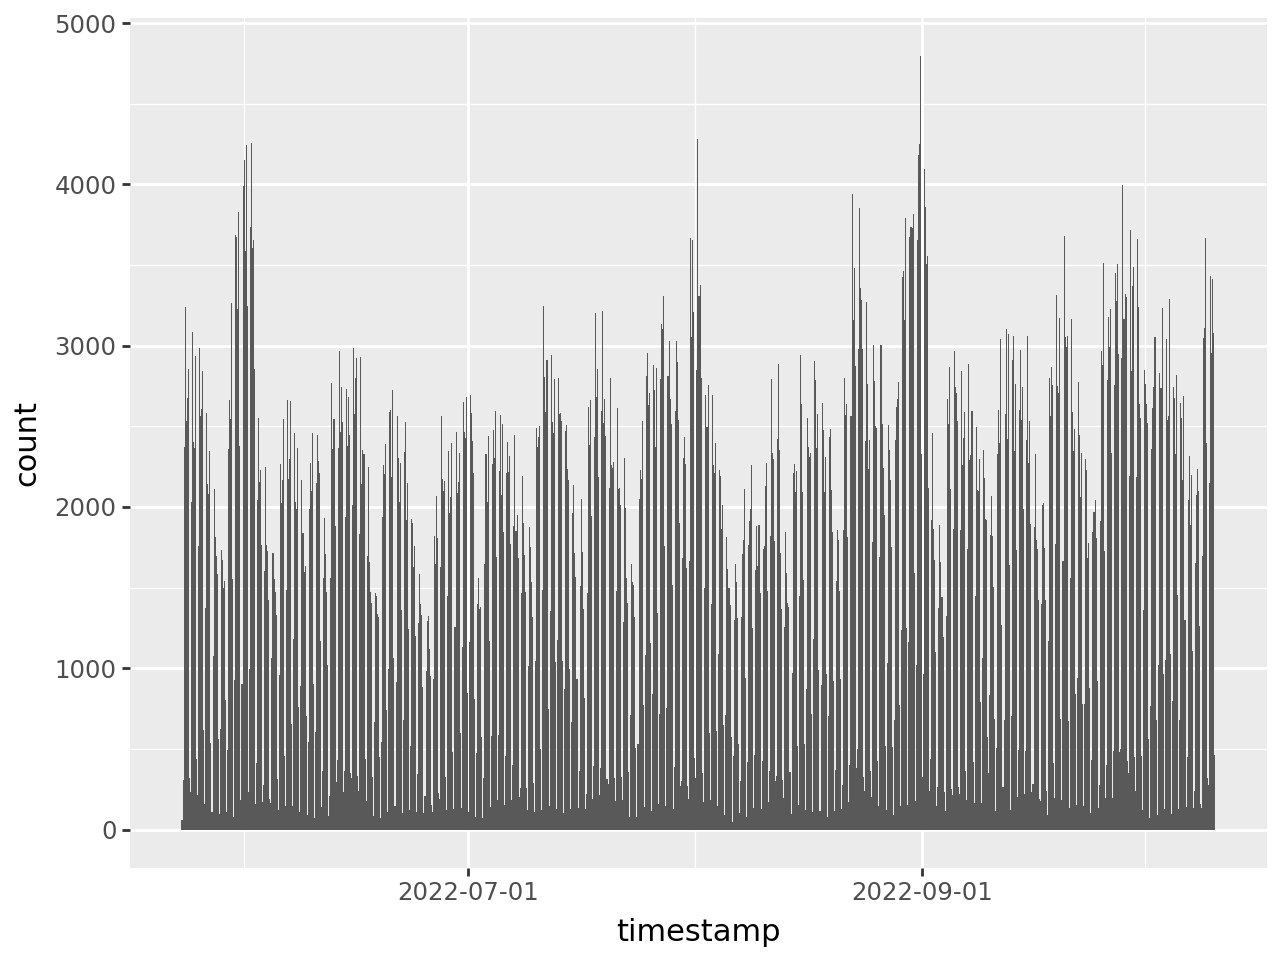

In [22]:
p9.ggplot(dfs["product_buy"],p9.aes(x="timestamp")) + p9.geom_histogram(bins=1000)

In [ ]:
timestamp relatively uniform

In [17]:
buy.describe()

statistic,client_id,timestamp,sku,action,category,price,name
str,f64,str,f64,str,f64,f64,f64
"""count""",1.682296e6,"""1682296""",1.682296e6,"""1682296""",1.682296e6,1.682296e6,1.682296e6
"""null_count""",0.0,"""0""",0.0,"""0""",0.0,0.0,0.0
"""mean""",1.1941e7,"""2022-08-03 16:59:32.528000""",746549.671699,null,3547.154632,51.303007,null
"""std""",6.8918e6,null,433618.826745,null,1916.609451,27.211957,null
"""min""",14.0,"""2022-05-23 00:10:40""",4.0,"""product_buy""",0.0,0.0,null
"""25%""",5.964836e6,"""2022-06-29 09:17:00""",369890.0,null,1946.0,29.0,null
"""50%""",1.1924383e7,"""2022-08-04 06:37:45""",745837.0,null,3509.0,53.0,null
"""75%""",1.791873e7,"""2022-09-08 09:56:50""",1.121913e6,null,5197.0,74.0,null
"""max""",2.3875234e7,"""2022-10-10 23:59:25""",1.495777e6,"""product_buy""",6918.0,99.0,null


In [19]:
buy.select(pl.all().n_unique())

client_id,timestamp,sku,action,category,price,name
u32,u32,u32,u32,u32,u32,u32
750860,827453,507107,1,6089,100,409517


In [21]:
1.7 million purchases, 750,000 clients, 500,000 items, 409000 names 6089 categories.

SyntaxError: invalid syntax (2650589948.py, line 1)

In [30]:
client_buy_stats = (
    buy
    .group_by("client_id")
    .agg(
        pl.col("sku").n_unique().alias("skus"),
        pl.col("category").n_unique().alias("categories"),
        pl.col("price").count().alias("sales_count"),
        pl.col("price").mean().alias("price_mean"),
        pl.col("price").sum().alias("sales_value"),
        (pl.col("timestamp").max() - pl.col("timestamp").min()).alias("duration"),
        
        
    )
    .with_columns(frequency=pl.col("duration")/pl.col("sales_count"))
    .sort("sales_value",descending=True)
)

In [31]:
client_buy_stats.head()

client_id,skus,categories,sales_count,price_mean,sales_value,duration,frequency
i64,u32,u32,u32,f64,i64,duration[ms],duration[ms]
13684077,21,8,665,61.21203,40706,3d 3h 55m 50s,6m 51s 52ms
1892456,23,3,374,89.957219,33644,140d 3h 35m 20s,8h 59m 36s 791ms
23668014,5,3,472,52.853814,24947,44d 18h 19m 25s,2h 16m 33s 993ms
20184912,12,8,440,56.027273,24652,57d 22h 10m 55s,3h 9m 34s 215ms
11426458,383,10,553,30.377939,16799,133d 16m 6s,5h 46m 21s 493ms


In [37]:
client_buy_stats.describe(percentiles=[0.01,.1,.25,.5,.75,.9,.99])

statistic,client_id,skus,categories,sales_count,price_mean,sales_value,duration,frequency
str,f64,f64,f64,f64,f64,f64,str,str
"""count""",750860.0,750860.0,750860.0,750860.0,750860.0,750860.0,"""750860""","""750860"""
"""null_count""",0.0,0.0,0.0,0.0,0.0,0.0,"""0""","""0"""
"""mean""",1.1940e7,1.813888,1.555587,2.240492,56.779341,114.943988,"""9 days, 4:35:37.567000""","""2 days, 12:35:36.092000"""
"""std""",6.8857e6,2.742158,1.718789,3.713613,23.699825,154.342931,null,null
"""min""",14.0,1.0,1.0,1.0,0.0,0.0,"""0:00:00""","""0:00:00"""
…,…,…,…,…,…,…,…,…
"""50%""",1.1934371e7,1.0,1.0,1.0,59.0,80.0,"""0:00:00""","""0:00:00"""
"""75%""",1.7895368e7,2.0,2.0,2.0,76.0,137.0,"""0:00:00""","""0:00:00"""
"""90%""",2.1485738e7,3.0,3.0,4.0,88.0,219.0,"""37 days, 7:28:55""","""8 days, 20:27:52.500000"""


In [ ]:
75% of clients 

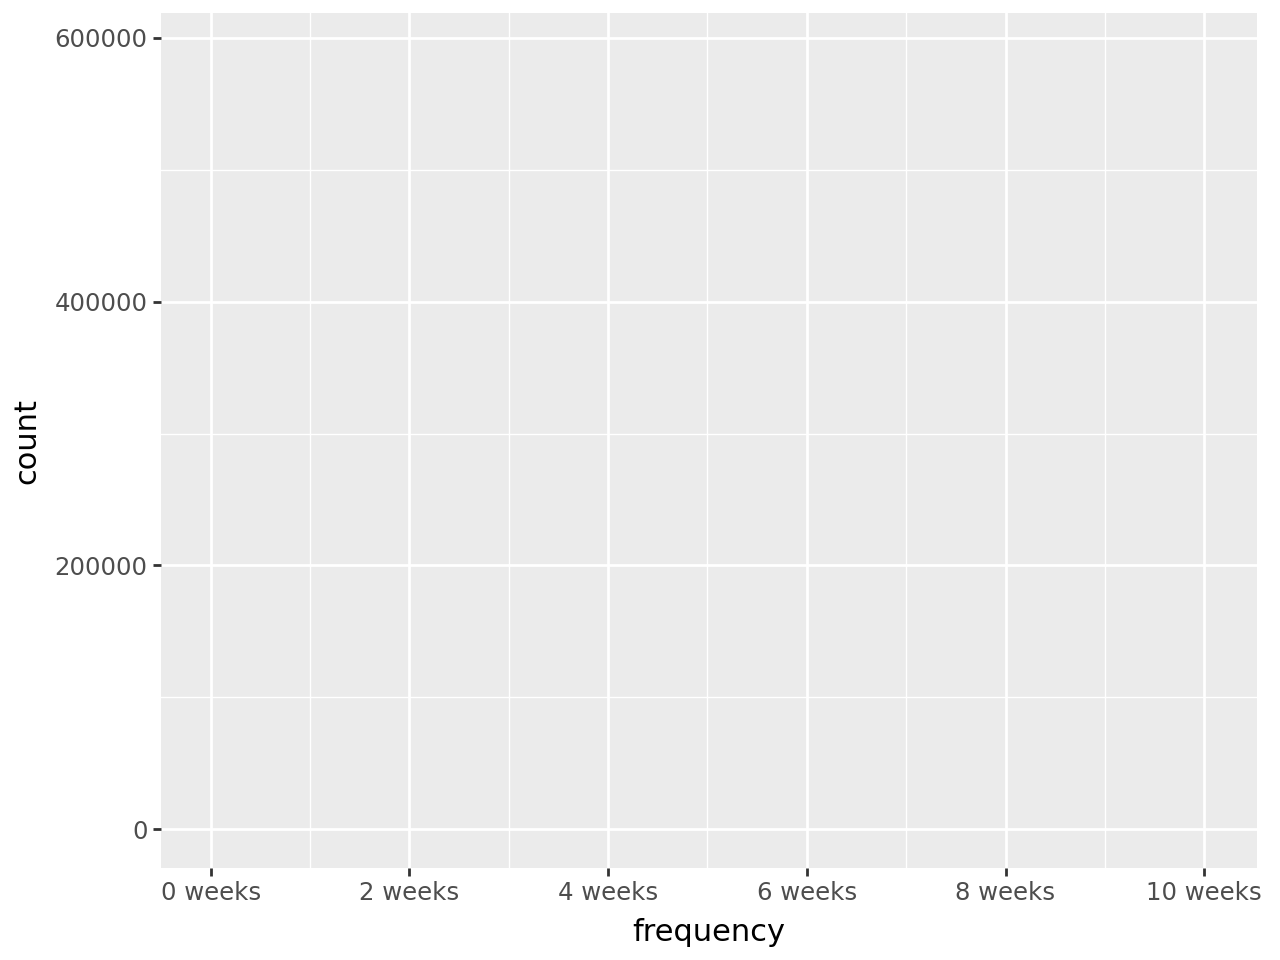

In [35]:
p9.ggplot(client_buy_stats,p9.aes(x="frequency")) + p9.geom_histogram(bins=10000)

In [28]:
buy["sku"].n_unique()

58336

In [37]:
skus = buy["sku"].value_counts(sort=True).with_columns(cum_count=pl.col("count").cum_sum()).with_columns(cum_freq=pl.col("cum_count")/pl.col("cum_count").tail(1))

In [43]:
skus[40000]

sku,count,cum_count,cum_freq
i64,u32,u32,f64
1373834,1,81665,0.81665


In [44]:
skus.shape

(58336, 4)

In [50]:
skus.head()

sku,count,cum_count,cum_freq
i64,u32,u32,f64
237442,109,109,0.00109
1061794,72,181,0.00181
1326077,66,247,0.00247
1466277,61,308,0.00308
604561,56,364,0.00364


In [68]:
product = pl.concat((buy,add_to_cart))

In [69]:
product.shape

(2000000, 7)

In [70]:
product.filter(pl.col("client_id")==4708463).sort("timestamp")

client_id,timestamp,sku,action,category,price,name
i64,datetime[ms],i64,str,i64,i64,str
4708463,2022-07-20 02:56:30,237442,"""add_to_cart""",2079,69,"""[230 124 223 77 226 148 132 1…"
4708463,2022-07-20 02:59:45,237442,"""product_buy""",2079,69,"""[230 124 223 77 226 148 132 1…"


In [71]:
product.filter(pl.col("sku")==237442).sort("client_id","timestamp")

client_id,timestamp,sku,action,category,price,name
i64,datetime[ms],i64,str,i64,i64,str
33711,2022-07-20 07:51:55,237442,"""product_buy""",2079,69,"""[230 124 223 77 226 148 132 1…"
178501,2022-07-19 13:40:55,237442,"""add_to_cart""",2079,69,"""[230 124 223 77 226 148 132 1…"
178501,2022-07-19 13:45:55,237442,"""product_buy""",2079,69,"""[230 124 223 77 226 148 132 1…"
257153,2022-07-20 19:38:05,237442,"""add_to_cart""",2079,69,"""[230 124 223 77 226 148 132 1…"
257153,2022-07-20 19:57:15,237442,"""add_to_cart""",2079,69,"""[230 124 223 77 226 148 132 1…"
…,…,…,…,…,…,…
23668014,2022-08-22 04:25:05,237442,"""product_buy""",2079,69,"""[230 124 223 77 226 148 132 1…"
23668014,2022-08-22 04:35:35,237442,"""add_to_cart""",2079,69,"""[230 124 223 77 226 148 132 1…"
23732846,2022-07-19 12:58:50,237442,"""product_buy""",2079,69,"""[230 124 223 77 226 148 132 1…"


In [72]:
product.filter(pl.col("client_id")==23732846).sort("timestamp")

client_id,timestamp,sku,action,category,price,name
i64,datetime[ms],i64,str,i64,i64,str
23732846,2022-07-19 12:58:50,237442,"""product_buy""",2079,69,"""[230 124 223 77 226 148 132 1…"
